## Загрузка необходимых библиотек

In [1]:
# импорт необходимых библиотек

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import recall_score

%matplotlib inline

## Считывание данных

In [2]:
# считывание обучающего датасета

df_train = pd.read_csv('data/train_dataset_train.csv', index_col='id')
df_train.head()

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
id,,,,,,,,,,,
1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


In [3]:
# считывание тестового датасета

df_test = pd.read_csv('data/test_dataset_test.csv', index_col='id')
df_test.head()

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm
id,,,,,,,,,
1091022,425A13E16226CA01032043111488E0F5,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:03
1091023,F94EDC107A4E054786882F9453C1B93F,Пропуск FacePay,184,Молодёжная (Западный),3010,Молодёжная,3,Арбатско-Покровская,2022-09-12 05:00:45
1091024,8F13BFBA98A7DD34B11BD2DDCC5CA68E,СК студента 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:52
1091025,7B98691636EC418ABF6FEDDE4D7C68FC,КОШЕЛЕК,107,Сокол ( Южн./Вост. ),2018,Сокол,2,Замоскворецкая,2022-09-12 05:00:58
1091026,679C55C28CB36FB546FD104502C0B3DB,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:39


In [4]:
# вывод типа данных в обучающем датасете

df_train.dtypes

ticket_id          object
ticket_type_nm     object
entrance_id         int64
entrance_nm        object
station_id          int64
station_nm         object
line_id             int64
line_nm            object
pass_dttm          object
time_to_under     float64
label               int64
dtype: object

In [5]:
# вывод типа данных в тестовом датасете

df_test.dtypes

ticket_id         object
ticket_type_nm    object
entrance_id        int64
entrance_nm       object
station_id         int64
station_nm        object
line_id            int64
line_nm           object
pass_dttm         object
dtype: object

In [6]:
# смена типа данных

df_train['pass_dttm'] = pd.to_datetime(df_train['pass_dttm'])

In [7]:
# смена типа данных

df_test['pass_dttm'] = pd.to_datetime(df_test['pass_dttm'])

## Генерация новых признаков

In [8]:
# создание новых признаков (день недели, часы, минуты, секунды)

df_train['dayofweek'] = df_train['pass_dttm'].dt.dayofweek
df_train['hour'] = df_train['pass_dttm'].dt.hour
df_train['minute'] = df_train['pass_dttm'].dt.minute
df_train['second'] = df_train['pass_dttm'].dt.second

In [9]:
# создание новых признаков (день недели, часы, минуты, секунды)

df_test['dayofweek'] = df_test['pass_dttm'].dt.dayofweek
df_test['hour'] = df_test['pass_dttm'].dt.hour
df_test['minute'] = df_test['pass_dttm'].dt.minute
df_test['second'] = df_test['pass_dttm'].dt.second

In [10]:
# создание нового признака количество минут с начала дня

df_train['minutes'] = (df_train['hour'] * 60 * 60 + df_train['minute'] * 60 + df_train['second']) / 60

In [11]:
# создание нового признака количество минут с начала дня

df_test['minutes'] = (df_test['hour'] * 60 * 60 + df_test['minute'] * 60 + df_test['second']) / 60

In [12]:
# создание нового признака временных интервалов с начала дня с шагом 30 мин.

df_train['minutes_interval'] = (df_train['minutes'] / 30).round().astype('int')

In [13]:
# создание нового признака временных интервалов с начала дня с шагом 30 мин.

df_test['minutes_interval'] = (df_test['minutes'] / 30).round().astype('int')

In [14]:
# перекодировка признака id станции из-за корреляции с номером линии метро

df_train['station_id_new'] = df_train['station_id'].apply(lambda x: int(str(x)[-3:]))

In [15]:
# перекодировка признака id станции из-за корреляции с номером линии метро

df_test['station_id_new'] = df_test['station_id'].apply(lambda x: int(str(x)[-3:]))

In [16]:
# проверка соответствия признака типа билета в тренировочном и тестовом датасете

set(df_test['ticket_type_nm']) - set(df_train['ticket_type_nm'])

{'СК студента на 3 месяца'}

In [17]:
# проверка соответствия признака типа билета в тренировочном и тестовом датасете

set(df_train['ticket_type_nm']) - set(df_test['ticket_type_nm'])

{'Билет 1 сутки ЕДИНЫЙ', 'ВЕСБ МО (тип 6)', 'ВЕСБ МО с сопровождающим'}

In [18]:
# создание множества наименований типа билета

ticket_type_nm = list(set(df_test['ticket_type_nm']) | set(df_train['ticket_type_nm']))

In [19]:
# проверка соответствия данных

df_train['ticket_type_nm'].nunique(), df_test['ticket_type_nm'].nunique(), len(ticket_type_nm)

(60, 58, 61)

In [20]:
# генерация кодов типа билета

ticket_type_nm_id = [x for x in range(len(ticket_type_nm))]

In [21]:
# создание словаря для преобразования переменной

ticket_type_nm_dict = dict(zip(ticket_type_nm, ticket_type_nm_id))

In [22]:
# кодировка признака наименования типа билета

df_train['ticket_type_nm_id'] = df_train['ticket_type_nm'].map(ticket_type_nm_dict).astype('int')

In [23]:
# кодировка признака наименования типа билета

df_test['ticket_type_nm_id'] = df_test['ticket_type_nm'].map(ticket_type_nm_dict).astype('int')

In [24]:
# корреляция признаков

df_train_corr = df_train.corr()

C:\Users\rus_k\AppData\Local\Temp\ipykernel_12228\2947991604.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_train_corr, dtype=np.bool))


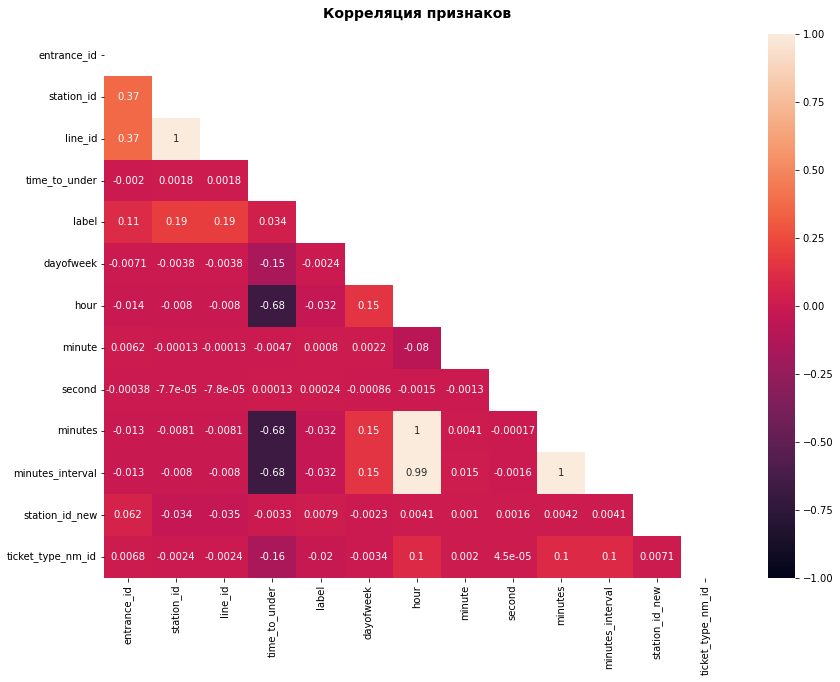

In [25]:
# визуализация корреляции признаков

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(df_train_corr, dtype=np.bool))
df_train_corr_heatmap = sns.heatmap(df_train_corr, mask=mask, vmin=-1, vmax=1, annot=True)
df_train_corr_heatmap.set_title('Корреляция признаков', fontweight='bold', fontdict={'fontsize':14}, pad=16)
plt.show()

In [26]:
# количество уникальных значений станций метро для предсказания

df_train['label'].nunique()

276

## Выделение выборок

In [27]:
# вывод наименований признаков

df_train.columns

Index(['ticket_id', 'ticket_type_nm', 'entrance_id', 'entrance_nm',
       'station_id', 'station_nm', 'line_id', 'line_nm', 'pass_dttm',
       'time_to_under', 'label', 'dayofweek', 'hour', 'minute', 'second',
       'minutes', 'minutes_interval', 'station_id_new', 'ticket_type_nm_id'],
      dtype='object')

In [61]:
# формирование данных для обучения и выборка признаков

X_train = df_train[['entrance_id', 'station_id', 'dayofweek', 'hour', 'minutes_interval', 'ticket_type_nm_id']]
X_train.head()

,entrance_id,station_id,dayofweek,hour,minutes_interval,ticket_type_nm_id
id,,,,,,
1,2402,11007,0,5,10,11
2,110,2006,0,5,10,30
3,110,2006,0,5,10,39
4,110,2006,0,5,10,25
5,110,2006,0,5,10,28


In [62]:
# формирование данных для обучения и выборка признаков

X_test = df_test[['entrance_id', 'station_id', 'dayofweek', 'hour', 'minutes_interval', 'ticket_type_nm_id']]
X_test.head()

,entrance_id,station_id,dayofweek,hour,minutes_interval,ticket_type_nm_id
id,,,,,,
1091022,110,2006,0,5,10,28
1091023,184,3010,0,5,10,11
1091024,110,2006,0,5,10,4
1091025,107,2018,0,5,10,28
1091026,110,2006,0,5,10,28


In [63]:
# предсказываемый признак

y_train = df_train['label']

## Обучение модели

In [64]:
# инициализация модели

clf = CategoricalNB(alpha=0.002, fit_prior=False)

In [65]:
# обучение модели

clf.fit(X_train, y_train)

CategoricalNB(alpha=0.002, fit_prior=False)

In [66]:
# предсказание модели для обучающих данных

y_pred_train = clf.predict(X_train)

## Оценка точности

In [67]:
# recall

recall_train = recall_score(y_train, y_pred_train, average='macro')
recall_train

0.09154279484368814

## Предсказание для тестовых данных

In [53]:
# предсказание модели для тестовых данных

y_pred_test = clf.predict(X_test)

## Сохранение полученных результатов в файл

In [40]:
# считывание и вывод формы для предсказываемых признаков

solution = pd.read_csv('data/solution.csv')
solution.head()

,id,time_to_under,label
0,1091022,531.122910,2017
1,1091023,389.526245,3016
2,1091024,480.562119,2017
3,1091025,530.464020,2017
4,1091026,529.972824,2017


In [41]:
# сохранение предсказанного значения времени очередного захода

solution['label'] = y_pred_test

In [42]:
# сохранение в файл полученных результатов

solution.to_csv('data/solution.csv', index=False)

In [43]:
# вывод данных

solution.head()

,id,time_to_under,label
0,1091022,531.122910,2022
1,1091023,389.526245,3016
2,1091024,480.562119,2022
3,1091025,530.464020,2022
4,1091026,529.972824,2022


## Анализ полученных результатов на тесте

In [54]:
0.292004 - 0.258920

0.033084

In [57]:
df_recall = pd.DataFrame([recall_train, 0.033084], \
                           index=['recall_train', 'r2_score_test'], \
                           columns=['score'])
df_recall

,score
recall_train,0.089037
r2_score_test,0.033084


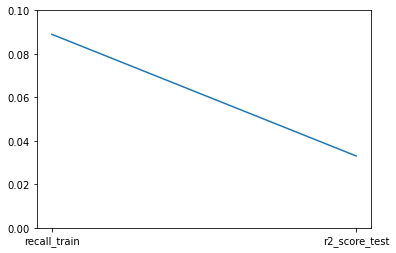

In [59]:
# визуализация полученной точности

plt.plot(df_recall)
plt.ylim(0, 0.1)
plt.show()

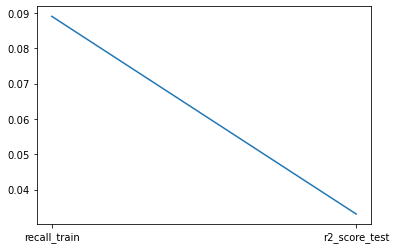

In [60]:
# визуализация полученной точности

plt.plot(df_recall)
plt.show()